# Полиномиальная регрессия с серией графиков

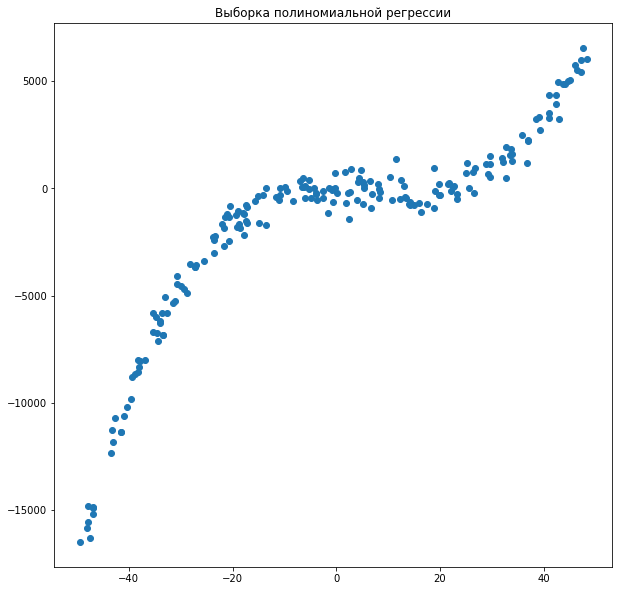

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from time import time

TOTAL = 200

def generate() -> (np.array, np.array):
    X, Y = [], []
    for i in range(TOTAL):
        x = np.random.uniform(-50, 50)
        y = -2*x - 2*(x)**2 + 0.1*(x)**3 - 10 + np.random.normal(0, 500)
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

X, Y = generate()
X, Y = X.reshape(-1, 1), Y.reshape(-1, 1)

plt.figure(figsize=(10, 10))
plt.title('Выборка полиномиальной регрессии')
plt.scatter(X, Y)
plt.show()

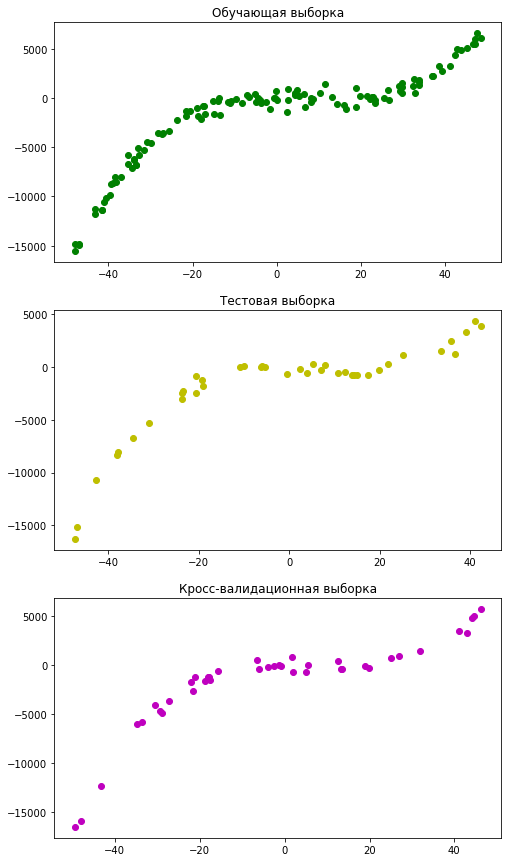

In [2]:
X_train, X_interval, Y_train, Y_interval = train_test_split(X, Y, test_size=0.4)
X_test, X_val, Y_test, Y_val = train_test_split(X_interval, Y_interval, test_size=0.5)

# Настройка размеров подложки
plt.figure(figsize=(8, 15))

# Вывод графиков
plt.subplot(3, 1, 1)
plt.title('Обучающая выборка')
plt.plot(X_train, Y_train, 'go')

plt.subplot(3, 1, 2)
plt.title('Тестовая выборка')
plt.plot(X_test, Y_test, 'yo')

plt.subplot(3, 1, 3)
plt.title('Кросс-валидационная выборка')
plt.plot(X_val, Y_val, 'mo')

plt.show()

### Проверим равенство моделей - ручками и с помощью sk

[[ 0.02323897]
 [-0.11949028]
 [-2.02153532]
 [ 0.10003235]]


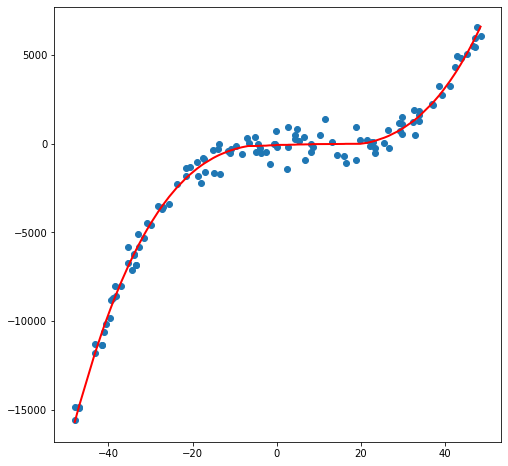

poly_regression in 0.516547 seconds


In [3]:
alpha = 0.0000000005 # Скорость обучения
iteration = TOTAL*100
m = TOTAL # Размер батча
cost_history = np.zeros(iteration) # История значений функции потерь 

def plot_poly_regression(x, y): 
    A = np.c_[np.ones((x.shape[0], 1)), x, x**2, x**3]
    theta = np.random.randn(A.shape[1], 1)
    lamda = 80
    for i in range(iteration):
        gradients = 1 / m * A.T.dot(A.dot(theta) - y) + (lamda/m) * theta 
        theta -= alpha * gradients
        cost_history[i] = (1/m) * np.sum(np.square(A.dot(theta)-y))
       
    print(theta)
    Y_prediction = A.dot(theta)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(sorted(x), sorted(Y_prediction), 'r-', linewidth=2)
    plt.show()

time_start = time()
plot_poly_regression(X_train, Y_train)
print("poly_regression in %f seconds" % (time() - time_start))

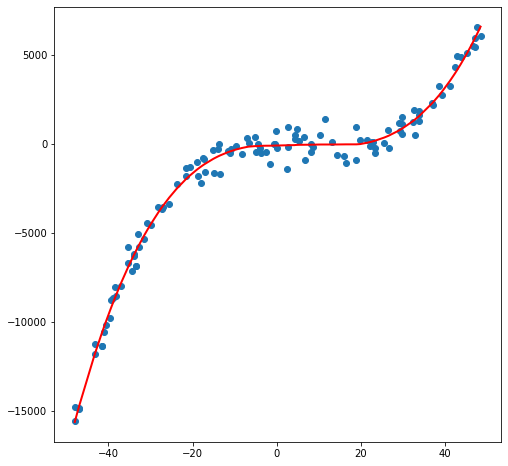

sk_polynomial_regression in 0.133703 seconds


In [4]:
def sk_polynomial_3(x, y):   
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    
    model = pol_reg.predict(X_poly)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(sorted(x), sorted(model), 'r-', linewidth=2)
    plt.show()

time_start = time()
sk_polynomial_3(X_train, Y_train)
print("sk_polynomial_regression in %f seconds" % (time() - time_start))

### График зависимости  функции потерь от количества итераций

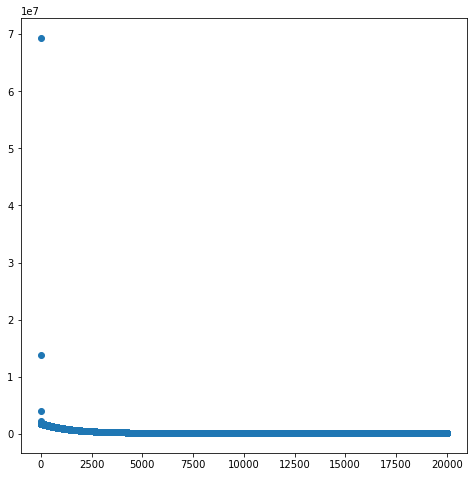

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(range(iteration), cost_history)
plt.show()

### График зависимсоти итоговой функции потерь от количества гиперпараметров (для нахождения оптимального количества гиперпараметров)


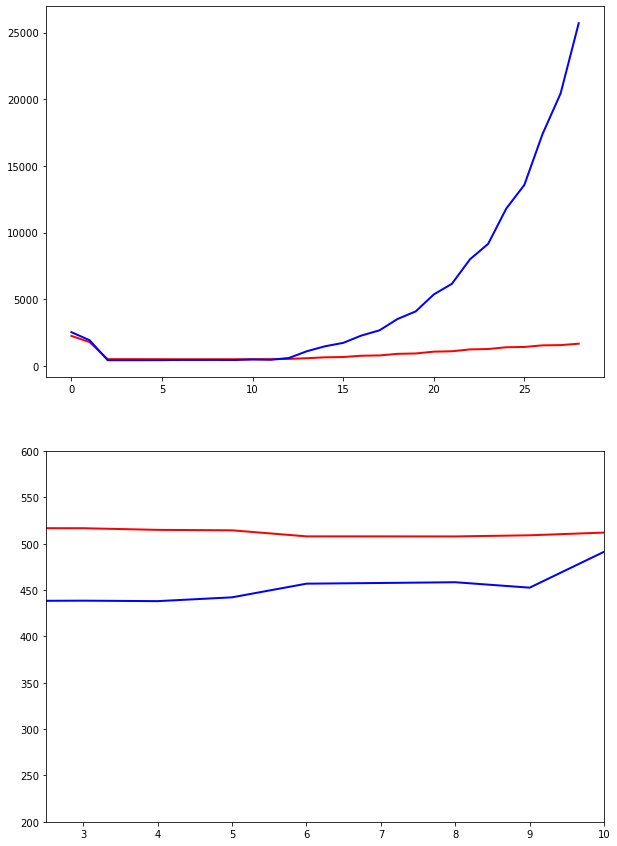

In [12]:
def graph_number_poly_regression(number):
    train_errors, val_errors = [], []
    
    for i in range (1, number):
        poly_reg = PolynomialFeatures(degree=i)
        poly_reg.fit(X)
        X_poly = poly_reg.fit_transform(X_train)
        X_poly_val = poly_reg.fit_transform(X_val)
        
        model = LinearRegression()
        model.fit(X_poly, Y_train)

        y_train_predict = model.predict(X_poly)
        train_errors.append(mean_squared_error(Y_train, y_train_predict))
        y_val_predict = model.predict(X_poly_val)
        val_errors.append(mean_squared_error(Y_val, y_val_predict))
    plt.figure(figsize=(10, 15))
    plt.subplot(2, 1, 1)
    plt.plot(np.sqrt(train_errors), "r-" , linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.subplot(2, 1, 2)
    plt.xlim(2.5, 10)
    plt.ylim(200, 600)
    plt.plot(np.sqrt(train_errors), "r-" , linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

graph_number_poly_regression(30)

### На графике приведены кривые обучения для полиномиальной модели

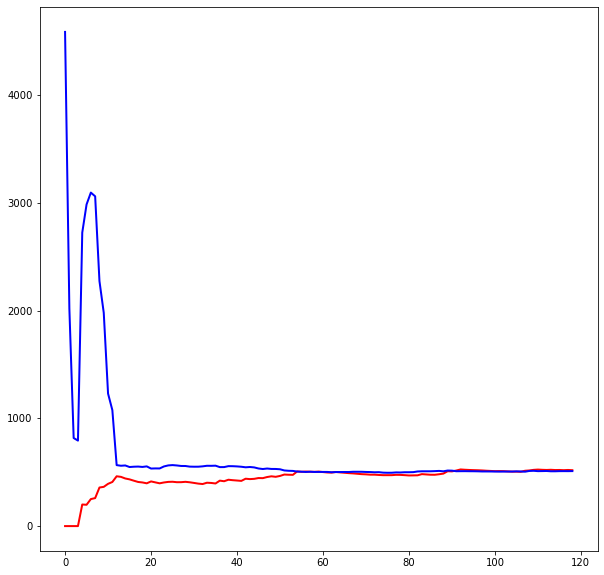

In [7]:
def graph_sk_poly_regression():
    train_errors, test_errors = [], []

    for i in range (1, len(X_train)):
        poly_reg = PolynomialFeatures(degree=3)
        X_poly = poly_reg.fit_transform(X_train)
        X_poly_1 = poly_reg.fit_transform(X_test)
        pol_reg = LinearRegression()
        pol_reg.fit(X_poly[:i], Y_train[:i])

        y_train_predict = pol_reg.predict(X_poly[:i])
        train_errors.append(mean_squared_error(y_train_predict, Y_train[:i]))
        y_test_predict = pol_reg.predict(X_poly_1)
        test_errors.append(mean_squared_error(y_test_predict , Y_test))
    plt.figure(figsize=(10, 10))
    plt.plot(np.sqrt(train_errors), "r-" , linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=2, label="test")
    
graph_sk_poly_regression()

### Примеры для тестовой выборки

[[-0.07838719]
 [-0.1887174 ]
 [-2.00753883]
 [ 0.10285707]]


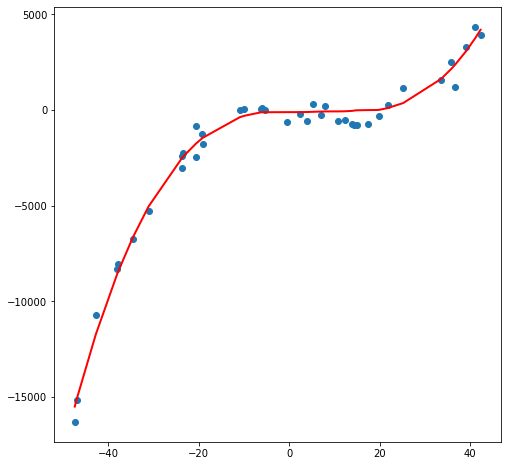

poly_regression in 0.458567 seconds


In [8]:
time_start = time()
plot_poly_regression(X_test, Y_test)
print("poly_regression in %f seconds" % (time() - time_start))

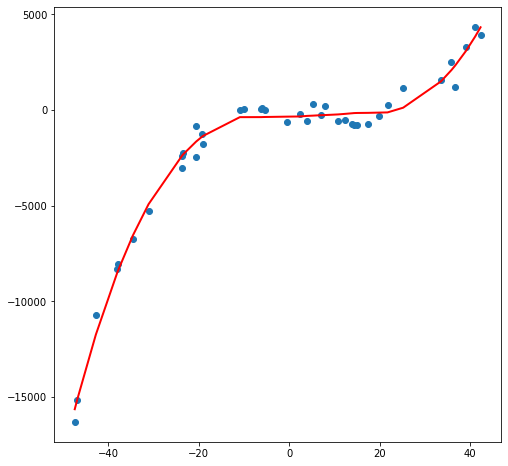

sk_polynomial_regression in 0.129630 seconds


In [9]:
time_start = time()
sk_polynomial_3(X_test, Y_test)
print("sk_polynomial_regression in %f seconds" % (time() - time_start))

### Возьмем другое alpha

[[-0.50969263]
 [-0.37745396]
 [ 0.7519112 ]
 [ 0.10176092]]


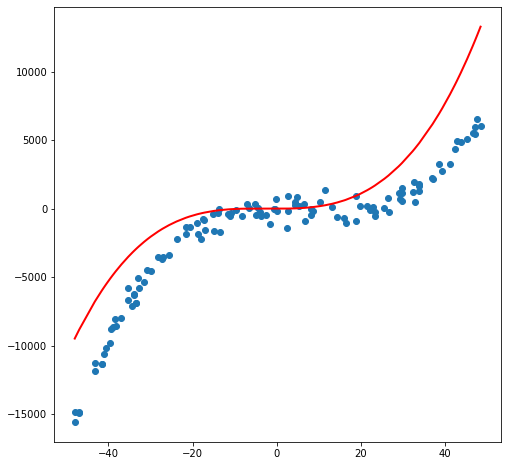

poly_regression in 0.470991 seconds


In [10]:
alpha = 0.000000000001 # Скорость обучения

time_start = time()
plot_poly_regression(X_train, Y_train)
print("poly_regression in %f seconds" % (time() - time_start))

[[-0.77116585]
 [-0.11337256]
 [ 1.16831665]
 [ 0.12180416]]


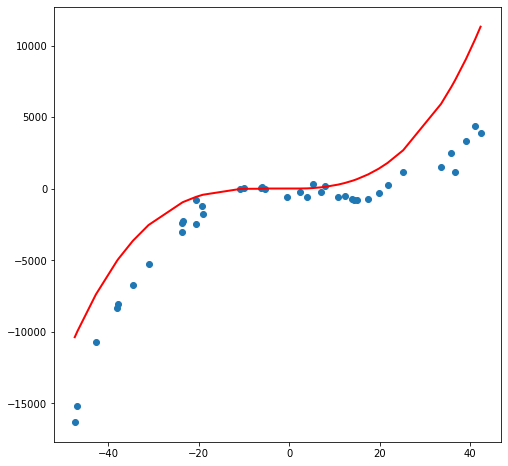

poly_regression in 0.515008 seconds


In [11]:
time_start = time()
plot_poly_regression(X_test, Y_test)
print("poly_regression in %f seconds" % (time() - time_start))